# Mandelbrot set

The Mandelbrot set is the set of values of _c_ in the complex plane for which the orbit of the critical point  $z=0$ under iteration of the quadratic map
$$
z_{n+1}=z_{n}^{2}+c
$$
remains bounded.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from numba import jit
%matplotlib inline

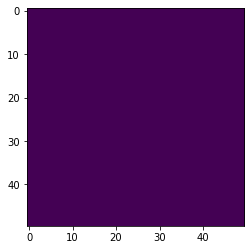

In [10]:
neg_bound = -50
pos_bound = 50
np.linspace(neg_bound, pos_bound, endpoint=True, dtype=int, num = 100)
np.zeros(shape=(pos_bound, pos_bound))
plt.imshow(np.zeros(shape=(pos_bound, pos_bound)))

In [22]:
'''n = 100
re_max = 2
im_max = 1
a = [(i,k) for i in np.round(np.linspace(-re_max,re_max, num=n), 2) for k in np.round(np.linspace(-im_max,im_max, num=n), 2)]
init_ary = np.zeros(shape=(len(a)), dtype=np.complex128)#.reshape(61, -1)
for i in range(len(a)):
    real = a[i][0]
    im = a[i][1]
    init_ary[i] = complex(real, im)'''
# così è stretchato, perché Re e Im non hanno lo stesso range

n = 1000
re_max = 2
im_max = 1
a = [(i,k) for i in np.round(np.linspace(-re_max,re_max, num=n), 2) for k in np.round(np.linspace(-re_max,re_max, num=n), 2)]
init_ary = np.zeros(shape=(len(a)), dtype=np.complex128)#.reshape(61, -1)
for i in range(len(a)):
    real = a[i][0]
    im = a[i][1]
    init_ary[i] = complex(real, im)

Now I have my "canvas" of complex numbers to be given to mandelbrot function.

In [59]:
def mandelbrot(c, max_iter = 100, div_thresh:float=2):
    z = 0
    cnt = 0
    for i in range(max_iter):
        z = z**2 + c
        cnt += 1
        if np.abs(z)>div_thresh:
            return cnt
    return 0

In [37]:
temp = []
for i in init_ary:
    temp.append(mandelbrot(i))

In [38]:
pd.Series(np.array(temp)).value_counts()

2     393020
1     216636
3     131594
0      96928
4      54036
       ...  
87        12
67        12
70        12
78        12
98         8
Length: 97, dtype: int64

In [39]:
ary = np.array(temp).reshape(n,-1)

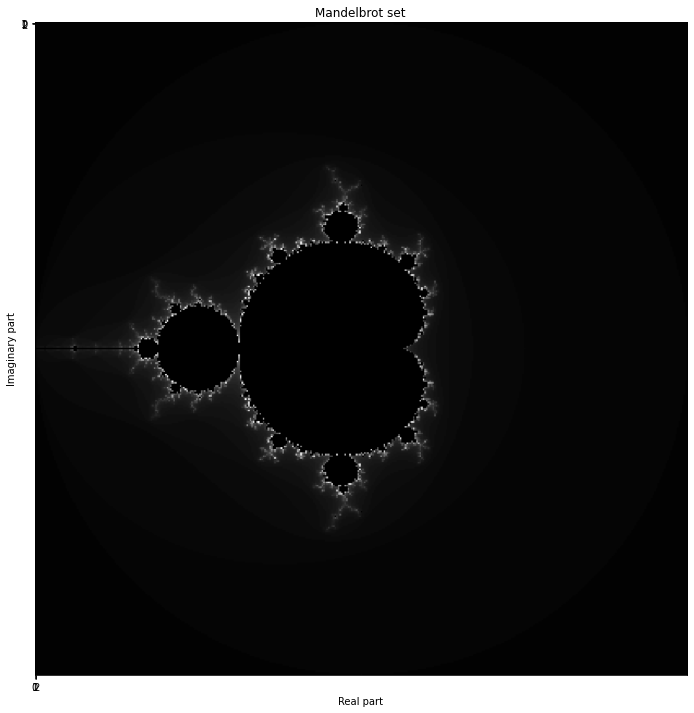

In [42]:
plt.figure(figsize=(12,12))
plt.xticks(np.linspace(-re_max, re_max, dtype=int, num = 5))
plt.yticks(np.linspace(-re_max, re_max, dtype=int, num = 5))
plt.ylabel("Imaginary part")
plt.xlabel("Real part")
plt.title("Mandelbrot set")
cmap = plt.get_cmap("gray")
plt.imshow(ary.T, cmap=cmap)
#plt.savefig("prova.png", dpi=500, format="png")

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from numba.typed import List
%matplotlib inline

@jit(nopython=True)
def mandelbrot(c, max_iter = 100, div_thresh:float=2):
    z = 0
    cnt = 0
    for i in range(max_iter):
        z = z**2 + c
        cnt += 1
        if np.abs(z)>div_thresh:
            return cnt
    return 0

def create_complex_matrix(sqrt_n_pixels:int, re_max:float, im_max:float, re_shift:float=0, im_shift:float=0,):
    a = [(i,k) for i in np.linspace(-re_max + re_shift, re_max + re_shift, num=sqrt_n_pixels) for k in np.linspace(-im_max + im_shift, im_max + im_shift, num=sqrt_n_pixels)]
    return List(a) # return typed_list to help numba (it raises a warning concerning reflecting list)

@jit(nopython=True)
def compute_mandelbrot(complex_canvas, sqrt_n_pixels:int, max_iterations:int=100):
    init_ary = np.zeros(shape=(len(complex_canvas)), dtype=np.complex128)
    for i in range(len(complex_canvas)):
        real = complex_canvas[i][0]
        im = complex_canvas[i][1]
        init_ary[i] = complex(real, im)
    temp = [mandelbrot(i, max_iter=max_iterations) for i in init_ary]
    ary = np.array(temp).reshape(sqrt_n_pixels,-1)
    return ary

def show_mandelbrot(ary, figsize, ylabel, xlabel, title, cmap):
    plt.figure(figsize=figsize)
    #plt.xticks(np.linspace(-re_max, re_max, dtype=int, num = 5))
    #plt.yticks(np.linspace(-re_max, re_max, dtype=int, num = 5))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    cmap = plt.get_cmap(cmap)
    plt.imshow(ary.T, cmap=cmap)

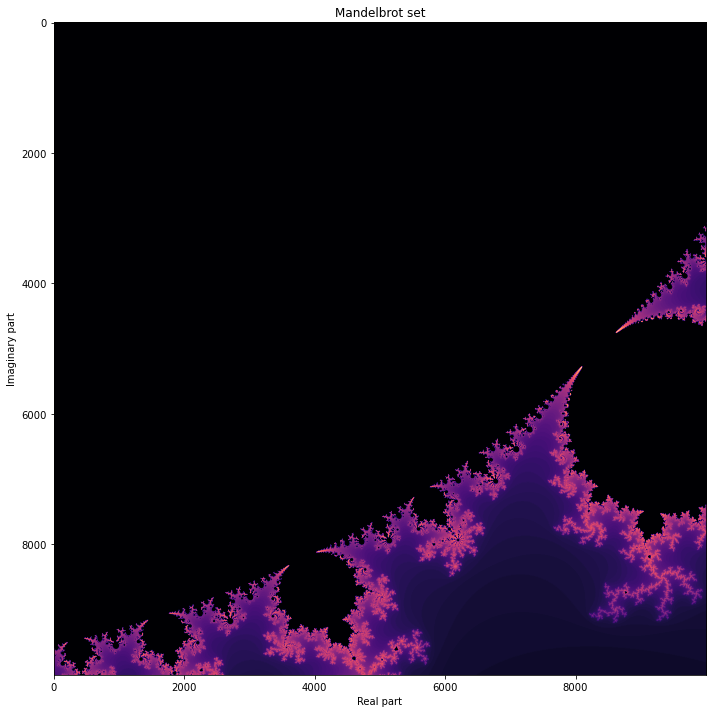

In [13]:
num_pix = 10000
re_max = 0.15
im_max = 0.15
re_shift = .15
im_shift = .5
max_iter = 100
complex_canvas = create_complex_matrix(num_pix, re_max, im_max, re_shift, im_shift)
ary = compute_mandelbrot(complex_canvas, num_pix, max_iterations=max_iter)
show_mandelbrot(ary, figsize=(12,12), ylabel="Imaginary part", xlabel="Real part", title="Mandelbrot set", cmap='magma')

In [56]:
temp = []
for i in init_ary:
    temp.append(mandelbrot(i))

In [57]:
ary = np.array(temp).reshape(n,-1)

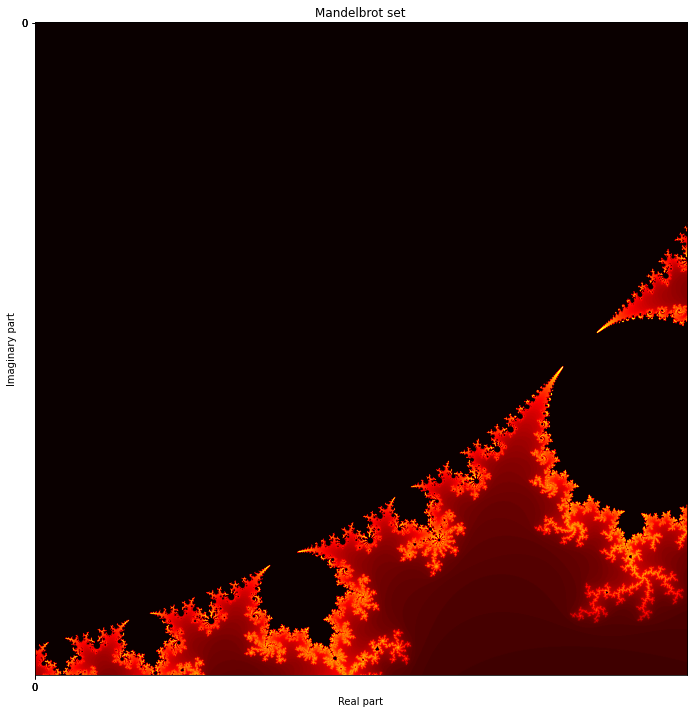

In [14]:
plt.figure(figsize=(12,12))
plt.xticks(np.linspace(-re_max, re_max, dtype=int, num = 5))
plt.yticks(np.linspace(-re_max, re_max, dtype=int, num = 5))
plt.ylabel("Imaginary part")
plt.xlabel("Real part")
plt.title("Mandelbrot set")
cmap = plt.get_cmap("hot")
plt.imshow(ary.T, cmap=cmap)
#plt.savefig("numba_prova_+_zoom.png", dpi=500, format="png")

---------

#Slider example

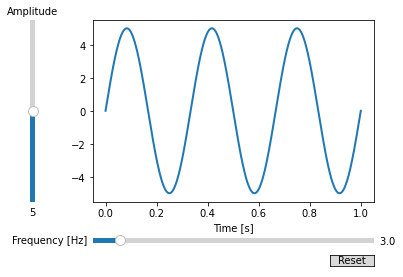

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
%matplotlib inline


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

# ERROR:
In jupyter it is not interactive